In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)
df

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [2]:
df['survival_status'].value_counts()

# conclusion: data set unbalance

1    225
2     81
Name: survival_status, dtype: int64

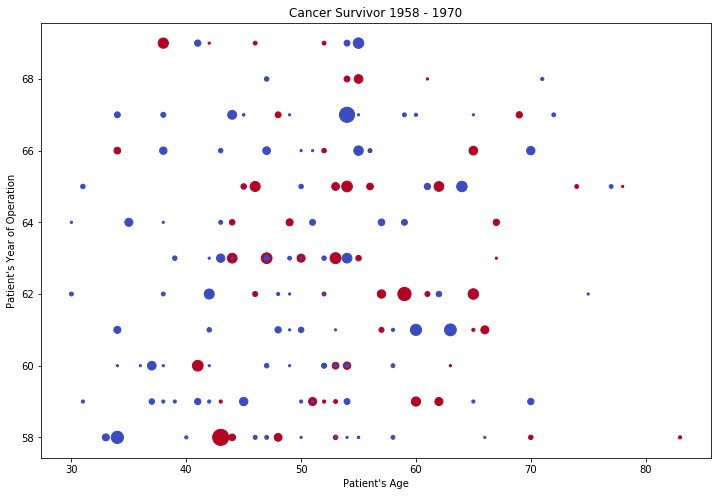

Size = Total Axillary Node(s) Detected
Blue = Survived, Red = Not Survived


In [29]:
# penggambaran distribusi data dalam grafik 

import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,8))
graphic = ax.scatter(x=df['Age'], 
                      y=df["Patient's Years"],
                      c=df['survival_status'],
                      s=df['N_positive_ax']*5,
                      cmap='coolwarm'
                      )

ax.set_xlabel("Patient's Age")
ax.set_ylabel("Patient's Year of Operation")
ax.set_title('Cancer Survivor 1958 - 1970')

plt.show()

print('Size = Total Axillary Node(s) Detected')
print('Blue = Survived, Red = Not Survived')


In [30]:
# pemisahan data X dan data y

X = df.drop(['survival_status'],axis=1)
y = df['survival_status']

# pemisahan data test dan data train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# pemilihan metode modelling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_rfc = RandomForestClassifier(max_depth=5)
model_gs = GridSearchCV

# penilaian cross validation menggunakan roc_auc

from sklearn.model_selection import cross_val_score

scoring = cross_val_score(model,X,y,scoring='roc_auc').mean()
print('Rata-rata Score ROC_AUC:',scoring)

# tahap training data
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Rata-rata Score ROC_AUC: 0.7069771241830065
Confusion Matrix: 
 [[67  5]
 [15  5]]
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        72
           2       0.50      0.25      0.33        20

    accuracy                           0.78        92
   macro avg       0.66      0.59      0.60        92
weighted avg       0.75      0.78      0.75        92

